In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

# Preprocessing

In [3]:
#the file path for our dataset
file_path = '/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv'

#reading dataset using pandas
data = pd.read_csv(file_path)

In [4]:
#assigning the first 5000 rows to 'data'
data = data.head(5000)

In [5]:
#displaying the first 5 rows
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
#structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               5000 non-null   object 
 1   age                  5000 non-null   float64
 2   hypertension         5000 non-null   int64  
 3   heart_disease        5000 non-null   int64  
 4   smoking_history      5000 non-null   object 
 5   bmi                  5000 non-null   float64
 6   HbA1c_level          5000 non-null   float64
 7   blood_glucose_level  5000 non-null   int64  
 8   diabetes             5000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 351.7+ KB


In [8]:
#statistical analysis for dataset
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,42.075032,0.077800,0.037400,27.362108,5.54596,138.105800,0.087200
std,22.537833,0.267883,0.189759,6.754316,1.08358,40.843343,0.282156
min,0.080000,0.000000,0.000000,10.010000,3.50000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.677500,4.80000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.80000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.542500,6.20000,159.000000,0.000000
max,80.000000,1.000000,1.000000,88.720000,9.00000,300.000000,1.000000


In [9]:
print(data['gender'].unique())
print(data['smoking_history'].unique())

['Female' 'Male']
['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [10]:
dict1 = {
    'Female': 0,
    'Male': 1
}

dict2 = {
    'never' : 0,
    'No Info' : 1,
    'current' : 2,
    'former' : 3,
    'ever' : 4,
    'not current' : 5
}

In [11]:
#changing categorical data to numerical data for training
data['gender'] = data['gender'].map(dict1)
data['smoking_history'] = data['smoking_history'].map(dict2)

print(data['gender'].unique())
print(data['smoking_history'].unique())

[0 1]
[0 1 2 3 4 5]


In [13]:
#last version of the dataset
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


# Training Model

In [14]:
#choosing feature and target values
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
x_val = np.array(data[features])
y_val = np.array(data['diabetes'])

In [16]:
#spliting as training and testing in order to check the model in the future
x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size = 0.3)

In [17]:
#training a logistic regression model
model_lr = LogisticRegression(max_iter = 1000)
model_lr.fit(x_train, y_train)

#predicting the model
y_pre = model_lr.predict(x_test)

#printing some scores for evaluation part
print('Accuracy: ', np.round(accuracy_score(y_test, y_pre), 3))
print('Precision: ', precision_score(y_test, y_pre))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pre))
print('Classification report: \n', classification_report(y_test, y_pre))

Accuracy:  0.963
Precision:  0.9306930693069307
Confusion matrix: 
 [[1351    7]
 [  48   94]]
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1358
           1       0.93      0.66      0.77       142

    accuracy                           0.96      1500
   macro avg       0.95      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500



In [18]:
#applying normalization to a logistic regression model to get better results
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model_scaled = LogisticRegression(max_iter = 1000)
model_scaled.fit(x_train_scaled, y_train)

y_pre2 = model_scaled.predict(x_test_scaled)

#printing the scores for  evaluation
print('Accuracy: ', np.round(accuracy_score(y_test, y_pre2), 3))
print('Precision: ', precision_score(y_test, y_pre2))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pre2))
print('Classification report: \n', classification_report(y_test, y_pre2))

Accuracy:  0.961
Precision:  0.9662921348314607
Confusion matrix: 
 [[1355    3]
 [  56   86]]
Classification report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1358
           1       0.97      0.61      0.74       142

    accuracy                           0.96      1500
   macro avg       0.96      0.80      0.86      1500
weighted avg       0.96      0.96      0.96      1500



# Checking other models

In [19]:
#creating Decision Tree model
model_tree = DecisionTreeClassifier()

#creating Random Forest model
model_forest = RandomForestClassifier()

#creating Support Vector Machine model
model_SVC = SVC()

In [20]:
#using votingclassifier to get better results from 3 models
vote = VotingClassifier(
    estimators = [('dt', model_tree), ('rf', model_forest), ('svm', model_SVC)],
    voting = 'hard'
)

vote.fit(x_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()), ('svm', SVC())])

In [22]:
#displaying evaluated results for each model
for classifier in (model_tree, model_forest, model_SVC, vote):
    classifier.fit(x_train, y_train)
    
    y_pre_models = classifier.predict(x_test)
    print(classifier.__class__.__name__)
    
    print('Accuracy: ', np.round(accuracy_score(y_test, y_pre_models), 3))
    print('Precision: ', precision_score(y_test, y_pre_models))
    print('Confusion matrix: \n', confusion_matrix(y_test, y_pre_models))
    print('Classification report: \n', classification_report(y_test, y_pre_models))
    print()

DecisionTreeClassifier
Accuracy:  0.945
Precision:  0.717391304347826
Confusion matrix: 
 [[1319   39]
 [  43   99]]
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1358
           1       0.72      0.70      0.71       142

    accuracy                           0.95      1500
   macro avg       0.84      0.83      0.84      1500
weighted avg       0.94      0.95      0.94      1500


RandomForestClassifier
Accuracy:  0.967
Precision:  0.9893617021276596
Confusion matrix: 
 [[1357    1]
 [  49   93]]
Classification report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1358
           1       0.99      0.65      0.79       142

    accuracy                           0.97      1500
   macro avg       0.98      0.83      0.89      1500
weighted avg       0.97      0.97      0.96      1500


SVC
Accuracy:  0.934
Precision:  1.0
Confusion matrix: 
 [[

# Visualization

<Axes: >

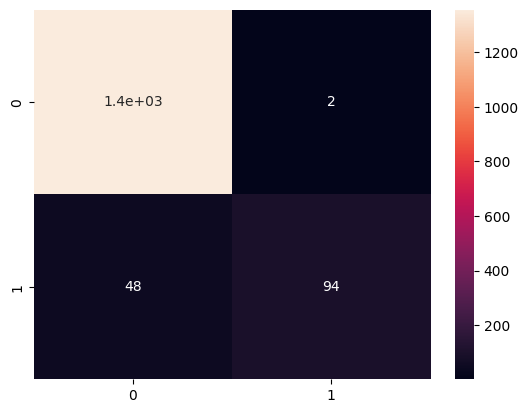

In [23]:
#choosing the best model as votingclassifier since it has better results 
vote.fit(x_train, y_train)
y_pre_vote = vote.predict(x_test)

#showing confusion matrix in heatmap
confusion_m = confusion_matrix(y_test, y_pre_vote)
sns.heatmap(data = confusion_m, annot = True)

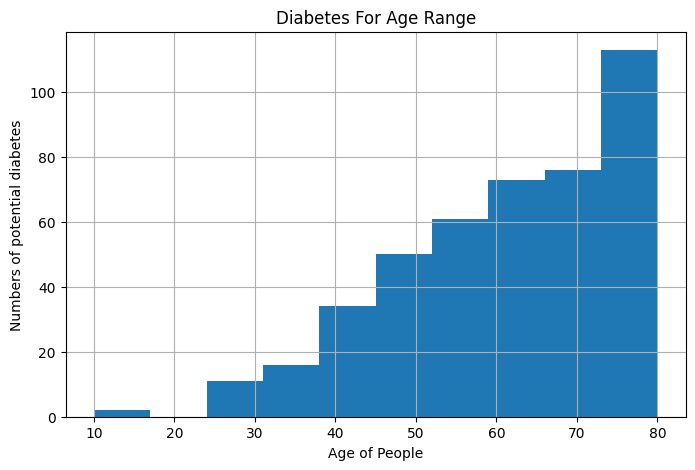

In [39]:
#choosing only diabetes(1) for their ages
diabetes_age = np.array(data[data['diabetes'] == 1]['age'])

#plotting the numbers of diabetes people in histogram
plt.figure(figsize = (8,5))
plt.hist(diabetes_age)
plt.grid()
plt.xlabel('Age of People')
plt.ylabel('Numbers of potential diabetes')
plt.title('Diabetes For Age Range', loc = 'center')
plt.show()

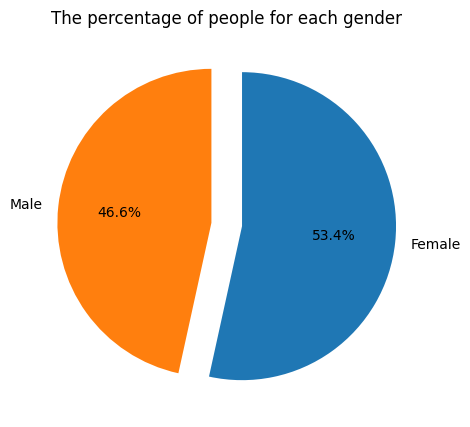

In [63]:
#taken diabetes potential for each gender
data_0 = data[data['gender'] == 0]
data_1 = data[data['gender'] == 1]

count_0 = len(data_0[data_0['diabetes'] == 1]['gender'])
count_1 = len(data_1[data_1['diabetes'] == 1]['gender'])

gender = np.array([count_0, count_1])

#plotting it in pie chart to identify their percentage easily
mylabels = ['Female', 'Male']
myexplode = [0.1 , 0.1]
plt.figure(figsize = (10,5))
plt.pie(gender, labels = mylabels, explode = myexplode, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('The percentage of people for each gender')
plt.show()